In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Offline Evaluation Results

In [12]:
df = pd.read_csv("offline_eval_results_20250723_172221.csv")
df = df.sort_values(by=['k', 'name'], ascending=[True, True])

# dropping Image Summary (Tone) rows
df = df[df['name']!="Image Summary (Tone)"]
df

,name,k,hit_rate,mean_avg_prec
8,Image Summary (Keywords),1,0.180213,0.180213
0,Normal,1,0.165152,0.165152
12,Screenshot Summary (Keywords),1,0.185926,0.185926
16,Screenshot and Header Image Keywords,1,0.203064,0.203064
9,Image Summary (Keywords),5,0.469229,0.141729
1,Normal,5,0.443002,0.130200
13,Screenshot Summary (Keywords),5,0.477279,0.144274
17,Screenshot and Header Image Keywords,5,0.502207,0.155596
10,Image Summary (Keywords),10,0.627629,0.122306
2,Normal,10,0.601402,0.111867


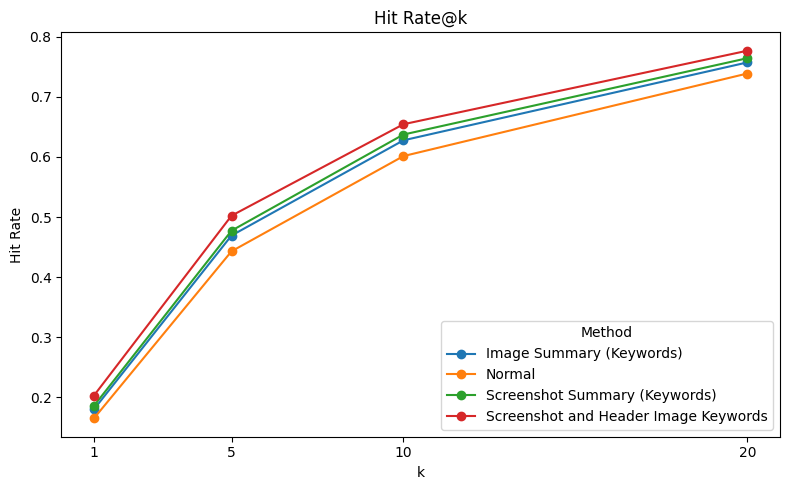

In [18]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['hit_rate'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Hit Rate')
plt.title('Hit Rate@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

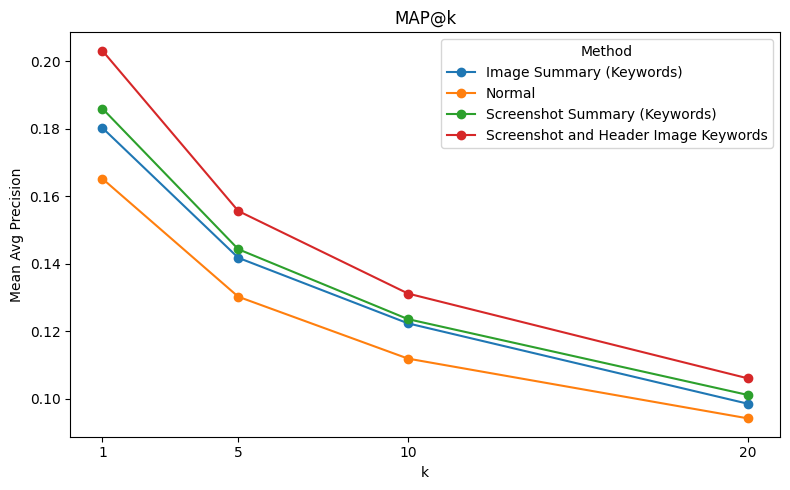

In [19]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['mean_avg_prec'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Mean Avg Precision')
plt.title('MAP@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()